# Airpods sentiment analysis
----Done by Colin Shu (https://github.com/ColinFangshu) 
<br> 8/7/2019

# Table of Contents

1.  [Introduction](#intro)
2.  [Import the raw training dataset](#GetData) 
<br>    2.1 [Clean the dataset](#import_and_drop_nan)
<br>    2.2 [EDA](#EDA)
3.  [Rating prediction](#PRED) 
<br>    3.1 [Process the text review](#process)
<br>    3.2 [Predict the sentiment using random forest](#pred_rf)
<br>    3.3 [Predict the sentiment using naive bayes](#pred_nb)
<br>    3.4 [Predict the sentiment using Support Vector model](#pred_svm)
4.  [Using LSTM recurrent nerual network to predict the sentiments](#pred_lstm)
5.  [Recommendation system](#recomm)

<a id='intro'><a/>
## 1. Introduction

<a id='GetData'><a/>
## 2. Import the raw tweets data

<a id='GetData'><a/>
### 2.1 Import and clean the data

In [ ]:
# import nltk
# nltk.download('wordnet')

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# The _plotly_future_ module must be imported before the plotly module
from _plotly_future_ import v4_subplots

In [38]:
# import basic libraries
import pandas as pd
import numpy as np
np.random.seed(0)

# import the function.py
import function as func

# import json
import json

# import libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from _plotly_future_ import v4_subplots
import plotly
from plotly.offline import plot, iplot
# *fill in username and API Key for plotly here*
plotly.tools.set_credentials_file(username='colinshu', api_key='HUWazM05Ux6JfdoslXnI')
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

# import libraries for text processing
from nltk.corpus import stopwords as stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# import logisticRegression model
from sklearn.linear_model import LogisticRegression

# import Suppport Vector Machine model
from sklearn import svm

# import RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# import XGBoost model
from xgboost import XGBClassifier

# import sklearn library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import MultiLabelBinarizer

import pickle 

In [ ]:
# cellphones_accessories = []
# for line in open('./data/reviews_Cell_Phones_and_Accessories_5.json', 'r'):
#     cellphones_accessories.append(json.loads(line))
# df_cellphones_accessories = pd.DataFrame(cellphones_accessories)

In [212]:
electronics = []
for line in open('./data/reviews_Electronics_5.json', 'r'):
    electronics.append(json.loads(line))
df_electronics = pd.DataFrame(electronics)

In [ ]:
# music_instruments = []
# for line in open('./data/reviews_Musical_Instruments_5.json', 'r'):
#     music_instruments.append(json.loads(line))
# df_music_instruments = pd.DataFrame(music_instruments)

In [ ]:
# kindles = []
# for line in open('./data/reviews_Kindle_Store_5.json', 'r'):
#     kindles.append(json.loads(line))
# df_kindles = pd.DataFrame(kindles)

In [213]:
# print('The shape of the cell phones and accessories dataset is {}'.format(df_cellphones_accessories.shape))
print('The shape of the electronics device dataset is {}'.format(df_electronics.shape))
# print('The shape of the music instruments dataset is {}'.format(df_music_instruments.shape))

The shape of the electronics device dataset is (1689188, 9)


In [ ]:
# df_cellphones_accessories.head()

In [214]:
df_electronics.head()

asin   helpful  overall  \
0  0528881469  [0, 0]    5.0       
1  0528881469  [12, 15]  1.0       
2  0528881469  [43, 45]  3.0       
3  0528881469  [9, 10]   2.0       
4  0528881469  [0, 0]    1.0       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
# df_music_instruments.head()

In [ ]:
# index = []
# for idx, review in enumerate(cellphones_accessories):
#     if review['reviewText'].lower().find('headphone') != -1 or review['reviewText'].lower().find('earphone') != -1 or review['reviewText'].lower().find('headset') != -1:
#         index.append(idx)
# print(len(index))
# df_cellphones_accessories_sliced = df_cellphones_accessories.loc[index]

In [ ]:
# index = []
# for idx, review in enumerate(electronics):
#     if review['reviewText'].lower().find('headphone') != -1 or review['reviewText'].lower().find('earphone') != -1 or review['reviewText'].lower().find('headset') != -1:
#         index.append(idx)
# print(len(index))
# df_electronics_sliced = df_electronics.loc[index]

In [ ]:
# index = []
# for idx, review in enumerate(music_instruments):
#     if review['reviewText'].lower().find('headphone') != -1 or review['reviewText'].lower().find('earphone') != -1 or review['reviewText'].lower().find('headset') != -1:
#         index.append(idx)
# print(len(index))
# df_music_instruments_sliced = df_music_instruments.loc[index]

In [ ]:
# index = []
# for idx, review in enumerate(electronics):
#     if (
#         review['reviewText'].lower().find('kindle') != -1 and 
#         review['reviewText'].lower().find('nook') == -1 and 
#         review['reviewText'].lower().find('tablet') == -1 and
#         review['reviewText'].lower().find('case') == -1 and
#         review['reviewText'].lower().find('cover') == -1 and
#         review['reviewText'].lower().find('charger') == -1 and
#         review['reviewText'].lower().find('kobo') == -1 
#        ):
#         index.append(idx)
# print(len(index))
# df_electronics_kindle_sliced = df_electronics.loc[index]

In [ ]:
# df_electronics.head()

In [ ]:
# list(set(df_electronics_kindle_sliced['asin'].values))

In [ ]:
# # top 20 frequent kindles
# unique_products_in_kindles = list(set(df_electronics_kindle_sliced['asin'].values))
# product_reviews_count_in_kindles = {asin: 0 for asin in unique_products_in_kindles}
# for asin in df_electronics_kindle_sliced['asin'].values:
#     product_reviews_count_in_kindles[asin] += 1
# ordered_reviewed_products_in_kindles = dict(OrderedDict(sorted(product_reviews_count_in_kindles.items(), 
#                                                    key = lambda t: t[1])))
# top_10_reviewed_products_in_kindles = {k: ordered_reviewed_products_in_kindles[k] 
#                             for k in list(ordered_reviewed_products_in_kindles)[-20:]}

In [6]:
# the kindle fire asin
asin_of_kindle_fire = 'B0074BW614'

In [7]:
kindle_fire_df = df_electronics[df_electronics['asin']==asin_of_kindle_fire]

In [8]:
print(kindle_fire_df.shape)
kindle_fire_df.head()

(2069, 9)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
1268161,B0074BW614,"[0, 1]",4.0,I loved my Kindle Fire my son bought me for Ch...,"09 19, 2013",A1QIJGJGUC7M3N,NaN,Just Fine,1379548800
1268162,B0074BW614,"[0, 1]",3.0,Kindle has come up with a new Kindle Fire HDX....,"09 27, 2013",A3TPTKY0E4YRJF,NaN,"Kindle Fire HD 7"", Dolby Audio, Dual-Band Wi-F...",1380240000
1268163,B0074BW614,"[0, 2]",5.0,Kindle is a great product and it works for me....,"07 17, 2013",AM42286XLFIEP,NaN,love it.,1374019200
1268164,B0074BW614,"[1, 4]",2.0,I am now on my second kindle and am still havi...,"01 21, 2013",A1BTK4LSRH7V18,NaN,Bad App store,1358726400
1268165,B0074BW614,"[2, 8]",1.0,"Personally, I feel that these units were NOT P...","02 26, 2013",AYWQ9M5JCG7CU,NaN,SPARE YOURSELF INCREDIBLE GRIEF & ANXIETY,1361836800


In [14]:
kindle_fire_df['datetime'] = pd.to_datetime(kindle_fire_df['unixReviewTime'], unit='s')

/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
kindle_fire_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,datetime
1268161,B0074BW614,"[0, 1]",4.0,I loved my Kindle Fire my son bought me for Ch...,"09 19, 2013",A1QIJGJGUC7M3N,NaN,Just Fine,1379548800,2013-09-19
1268162,B0074BW614,"[0, 1]",3.0,Kindle has come up with a new Kindle Fire HDX....,"09 27, 2013",A3TPTKY0E4YRJF,NaN,"Kindle Fire HD 7"", Dolby Audio, Dual-Band Wi-F...",1380240000,2013-09-27
1268163,B0074BW614,"[0, 2]",5.0,Kindle is a great product and it works for me....,"07 17, 2013",AM42286XLFIEP,NaN,love it.,1374019200,2013-07-17
1268164,B0074BW614,"[1, 4]",2.0,I am now on my second kindle and am still havi...,"01 21, 2013",A1BTK4LSRH7V18,NaN,Bad App store,1358726400,2013-01-21
1268165,B0074BW614,"[2, 8]",1.0,"Personally, I feel that these units were NOT P...","02 26, 2013",AYWQ9M5JCG7CU,NaN,SPARE YOURSELF INCREDIBLE GRIEF & ANXIETY,1361836800,2013-02-26


In [25]:
kindle_fire_df.to_csv(r'csv_files/kindle_fire_df')

In [3]:
kindle_fire_df = pd.read_csv('csv_files/kindle_fire_df')

In [4]:
kindle_fire_ordered_df = kindle_fire_df.sort_values(by='datetime')

In [5]:
kindle_fire_ordered = pd.Series(list(kindle_fire_ordered_df.overall), index=kindle_fire_ordered_df.datetime)

In [6]:
kindle_fire_ordered.index = pd.to_datetime(kindle_fire_ordered.index)

In [7]:
kindle_fire_week_ordered = kindle_fire_ordered.resample('W').mean()
kindle_fire_count_ordered = kindle_fire_ordered.resample('W').count()

In [633]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
                x=kindle_fire_week_ordered.index,
                y=kindle_fire_week_ordered.values,
                name="average rating per week",
                line_color='deepskyblue',
                opacity=0.8),
             secondary_y=False,)

fig.add_trace(go.Scatter(
                x=kindle_fire_count_ordered.index,
                y=kindle_fire_count_ordered.values,
                name="total reviews per week",
                line_color='dimgray',
                opacity=0.8),
             secondary_y=True,)

# Add figure title
fig.layout.update(
    title_text="The average rating and reviews count per week of product Kindle Fire"
)

# Use date string to set xaxis range
fig.layout.update(xaxis_range=['2012-10-01','2014-07-31'])

# Set y-axes titles
fig.update_yaxes(title_text="average <b>rating</b> per week", secondary_y=False)
fig.update_yaxes(title_text="total <b>reviews</b> per week", secondary_y=True)

py.plot(fig, filename="sentiment_analysis_first_graph")

'https://plot.ly/~colinshu/19'

In [632]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
                x=kindle_fire_week_ordered.index,
                y=kindle_fire_week_ordered.values,
                name="average rating per week",
                line_color='deepskyblue',
                opacity=0.8),
             secondary_y=False,)

fig.add_trace(go.Scatter(
                x=kindle_fire_count_ordered.index,
                y=kindle_fire_count_ordered.values,
                name="total reviews per week",
                line_color='dimgray',
                opacity=0.8),
             secondary_y=True,)

# Add figure title
fig.layout.update(
    title_text="The average rating and reviews count per week of product Kindle Fire"
)

# Use date string to set xaxis range
fig.layout.update(xaxis_range=['2012-10-01','2014-07-31'])

# Set y-axes titles
fig.update_yaxes(title_text="average <b>rating</b> per week", secondary_y=False)
fig.update_yaxes(title_text="total <b>reviews</b> per week", secondary_y=True)

fig.show()

In [24]:
review_count


overall
1.0      35
2.0      43
3.0     116
4.0     393
5.0    1482
Name: reviewText, dtype: int64

In [634]:
review_count = kindle_fire_df.groupby(by='overall').count().reviewText

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=review_count.index, y=review_count.values,
            text=review_count.values,
            textposition='auto',
        )])

fig.layout.update(
    title=go.layout.Title(
        text="The histogram of the product ratings of Kindle Fire during 10/2012 to 07/2014",
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="ratings",
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="reviews count",
        )
    )
)

py.plot(fig, filename="sentiment_analysis_second_graph")

fig.show()

In [ ]:
unique_products = list(set(df_electronics['asin'].values))
unique_users = list(set(df_electronics['reviewerID'].values))

In [ ]:
product_ids = {asin: i for (i, asin) in enumerate(unique_products)}
user_ids = {reviewer_id: i for (i, reviewer_id) in enumerate(unique_users)}

In [ ]:
df_electronics['user'] = df_electronics['reviewerID'].apply(user_ids.get)

In [ ]:
df_electronics['product'] = df_electronics['asin'].apply(product_ids.get)

In [ ]:
product_reviews_count = {asin: 0 for asin in unique_products}
for asin in df_electronics['asin'].values:
    product_reviews_count[asin] += 1

In [ ]:
from collections import OrderedDict
ordered_reviewed_products = dict(OrderedDict(sorted(product_reviews_count.items(), 
                                                   key = lambda t: t[1])))
top_10_reviewed_products = {k: ordered_reviewed_products[k] 
                            for k in list(ordered_reviewed_products)[-20:]}

In [ ]:
top_10_reviewed_products

In [ ]:
# product_list = []
# user_list = []
# for idx, (user, product) in enumerate(zip(list(df_electronics['reviewerID'].values), list(df_electronics['asin'].values))):
#     user_list.append(user_setlist[user])
#     product_list.append(product_setlist[product])

In [ ]:
# data = {'product':product_list, 'user':user_list, 'rating':df_electronics['overall'].values}
# product_df = pd.DataFrame(data=data)

In [ ]:
product_df = df_electronics[['user', 'product', 'overall']]

In [ ]:
product_df.head()

In [ ]:
# index = []
# for idx, review in enumerate(electronics):
#     if (
#         review['reviewText'].lower().find('nook') != -1 and 
#         review['reviewText'].lower().find('kindle') == -1 and 
#         review['reviewText'].lower().find('tablet') == -1 and
#         review['reviewText'].lower().find('case') == -1 and
#         review['reviewText'].lower().find('cover') == -1 and
#         review['reviewText'].lower().find('charger') == -1 and
#         review['reviewText'].lower().find('kobo') == -1 
#        ):
#         index.append(idx)
# print(len(index))
# df_electronics_nook_sliced = df_electronics.loc[index]

In [ ]:
# index = []
# for idx, review in enumerate(electronics):
#     if (
#         review['reviewText'].lower().find('tablet') != -1 and 
#         review['reviewText'].lower().find('kindle') == -1 and 
#         review['reviewText'].lower().find('nook') == -1 and
#         review['reviewText'].lower().find('case') == -1 and
#         review['reviewText'].lower().find('cover') == -1 and
#         review['reviewText'].lower().find('charger') == -1 and
#         review['reviewText'].lower().find('kobo') == -1 
#        ):
#         index.append(idx)
# print(len(index))
# df_electronics_tablet_sliced = df_electronics.loc[index]

In [226]:
index = []
for idx, review in enumerate(electronics):
    if (
        review['reviewText'].lower().find('kobo') != -1 or 
        review['reviewText'].lower().find('kindle') != -1 or 
        review['reviewText'].lower().find('nook') != -1 or
        review['reviewText'].lower().find('tablet') != -1 
       ):
        index.append(idx)
print(len(index))
df_electronics_sliced = df_electronics.loc[index]

100949


In [227]:
df_electronics_sliced.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
5,0594451647,"[3, 3]",5.0,I am using this with a Nook HD+. It works as described. The HD picture on my Samsung 52&#34; TV is excellent.,"01 3, 2014",A2JXAZZI9PHK9Z,"Billy G. Noland ""Bill Noland""",HDMI Nook adapter cable,1388707200
6,0594451647,"[0, 0]",2.0,The cable is very wobbly and sometimes disconnects itself.The price is completely unfair and only works with the Nook HD and HD+,"04 27, 2014",A2P5U7BDKKT7FW,Christian,Cheap proprietary scam,1398556800
7,0594451647,"[0, 0]",5.0,"This adaptor is real easy to setup and use right out of the box. I had not problem with it at all, it is well worth the purchase. I recommend this adaptor very much for viewing your Nook videos on your HDTV. I just disagree with other reviews on the length of the adaptor, I found it to be fairly adequate as to how and where it is connected to my TV. For me it was just right not too long or too short, I was able to place my Nook right below the connection on the TV stand, it did not fall or anything else, it is fine. Use your own judgement, I'm too busy watching my movies :)","05 4, 2014",AAZ084UMH8VZ2,"D. L. Brown ""A Knower Of Good Things""",A Perfdect Nook HD+ hook up,1399161600
8,0594451647,"[0, 0]",4.0,"This adapter easily connects my Nook HD 7&#34; to my HDTV through the HDMI cable. This is good for traveling because it makes any hotel TV a potential smart TV so long as there is an accessible HDMI port. It is also good for sharing photos from FB on a bigger screen. A bit pricey, but a good accessory to have. Be sure to note that this is ONLY for the Nook HD and HD+ series. It will not work with a standard Nook.","07 11, 2014",AEZ3CR6BKIROJ,Mark Dietter,A nice easy to use accessory.,1405036800
9,0594451647,"[3, 3]",5.0,This product really works great but I found the following items you need to keep in mind:- You must have your power adapter connected for it to work...it plugs in the the bottom. It appears it needs power from the nook power adapter to operate.- The plug fits in loosely and you cannot move the Nook around much without holding the adapter in place.- On initial plugin it seems you need to rock it around to get the connection but then it seems solid.- It works with a 25ft high quality HDMI cable so you can put the NOOK across the room with you. Not tested with cheap cables.Warning...I found that my LG SmartTV 3D from a few years back does not work with this adapter but it does not seem to work with many things...bad software. This adapter works fine with other HDMI devices I have used like monitors and I am sure other TVs.Gave it five stars because it really is nice to extend the screen and use your Nook as a streaming server to your TV. Nice they made such a device.,"01 20, 2014",A3BY5KCNQZXV5U,Matenai,This works great but read the details...,1390176000


In [228]:
df_electronics_sliced.reset_index()

index        asin   helpful  overall  \
0       5        0594451647  [3, 3]    5.0       
1       6        0594451647  [0, 0]    2.0       
2       7        0594451647  [0, 0]    5.0       
3       8        0594451647  [0, 0]    4.0       
4       9        0594451647  [3, 3]    5.0       
5       11       0594481813  [0, 0]    5.0       
6       13       0594481813  [0, 1]    3.0       
7       15       0594481813  [0, 0]    3.0       
8       237      1400501466  [3, 4]    5.0       
9       238      1400501466  [1, 2]    3.0       
10      240      1400501466  [1, 1]    5.0       
11      241      1400501466  [0, 1]    5.0       
12      242      1400501466  [4, 9]    1.0       
13      243      1400501466  [11, 11]  5.0       
14      244      1400501466  [0, 0]    3.0       
15      245      1400501466  [0, 1]    5.0       
16      247      1400501466  [1, 1]    5.0       
17      248      1400501466  [17, 19]  5.0       
18      249      1400501466  [1, 1]    2.0       
19      250      1400501466  [1, 1]    5.0       
20      251      1400501466  [5, 5]    2.0       
21      252      1400501466  [6, 6]    4.0       
22      253      1400501466  [0, 0]    3.0       
23      254      1400501466  [1, 2]    5.0       
24      256      1400501466  [0, 0]    5.0       
25      257      1400501466  [0, 0]    5.0       
26      258      1400501466  [2, 3]    5.0       
27      259      1400501466  [3, 3]    5.0       
28      260      1400501466  [6, 6]    1.0       
29      262      1400501466  [0, 0]    5.0       
...     ...             ...     ...    ...       
100919  1688931  B00KLGSQJ0  [1, 1]    4.0       
100920  1688934  B00KMQ3S2E  [0, 0]    4.0       
100921  1688935  B00KMQ3S2E  [0, 0]    5.0       
100922  1688937  B00KMQ3S2E  [0, 0]    5.0       
100923  1688939  B00KMQ3S2E  [1, 1]    4.0       
100924  1688941  B00KMQ3S2E  [0, 0]    5.0       
100925  1688942  B00KMQ3S2E  [0, 0]    5.0       
100926  1688946  B00KMRGB7C  [1, 1]    5.0       
100927  1688956  B00KMRGF3M  [4, 4]    3.0       
100928  1688957  B00KMRGF3M  [1, 1]    3.0       
100929  1688959  B00KMRGF3M  [7, 8]    5.0       
100930  1688960  B00KMRGF3M  [10, 14]  3.0       
100931  1688961  B00KMRGF3M  [50, 50]  5.0       
100932  1688974  B00KNM763E  [0, 0]    4.0       
100933  1689076  B00KWHMR6G  [5, 8]    2.0       
100934  1689077  B00KWHMR6G  [9, 11]   5.0       
100935  1689081  B00KWHMR6G  [4, 4]    5.0       
100936  1689097  B00KYMCJF8  [2, 2]    4.0       
100937  1689129  B00L2442H0  [0, 0]    5.0       
100938  1689130  B00L2442H0  [0, 0]    5.0       
100939  1689131  B00L2442H0  [0, 0]    4.0       
100940  1689137  B00L2442H0  [0, 0]    5.0       
100941  1689138  B00L2442H0  [0, 0]    5.0       
100942  1689140  B00L2442H0  [0, 0]    5.0       
100943  1689144  B00L26YDA4  [0, 0]    4.0       
100944  1689146  B00L26YDA4  [1, 2]    4.0       
100945  1689150  B00L26YDA4  [3, 4]    5.0       
100946  1689166  B00L3YHF6O  [7, 11]   5.0       
100947  1689168  B00L3YHF6O  [5, 12]   5.0       
100948  1689173  B00L3YHF6O  [1, 2]    5.0       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [230]:
import random
new_index = []
while len(new_index) < 3000:
    new_index.append(random.randint(0, 100000))
    new_index = list(set(new_index))

In [233]:
new_index = sorted(new_index)

In [235]:
df_electronics_sliced = df_electronics_sliced.iloc[new_index,:]

In [236]:
df_electronics_sliced.shape

(3000, 9)

<a id='GetData'><a/>
### 2.2 EDA

In [ ]:
df_electronics_kindle_sliced['device'] = 'kindle'
df_electronics_nook_sliced['device'] = 'nook'
df_electronics_tablet_sliced['device'] = 'tablet'
df_electronics_kobo_sliced['device'] = 'kobo'

In [ ]:
df = pd.concat([df_electronics_kindle_sliced,
#                df_electronics_nook_sliced,
#                df_electronics_tablet_sliced,
#                df_electronics_kobo_sliced
               ])
df.reset_index(inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.distplot(product_df['rating'])
plt.title("the rating of electronic devices");

<a id='PRED'><a/>
## 3. Rating prediction

<a id='process'><a/>
### 3.1 Process the text review

In [265]:
# use the whole electronics data set to predict
df = df_electronics_sliced.copy()

In [266]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
254,1400501466,"[1, 2]",5.0,"The nook tablet is great.I have used it to check e-mail,browse and look at books,and also transferred one from my p.c.I like the way it will sync with the direction its rotated,and I love the touch screen.Thanks Amazon!","08 4, 2013",AHEP4N0XIJR1K,jlt246,New Nook H D,1375574400
258,1400501466,"[2, 3]",5.0,"I have tried the IPad, the Kindle, and the Sony, and nothing has worked better than this Nook Tablet. It's light, the screen resolution is amazing for movies, and the applications I use work beautifully. Even the speakers are excellent for what they are. No complaints at all.","02 16, 2012",A1WRXACOKPITBQ,"Leiah ""So, I Read This Book Today . . .""",Best out there,1329350400
271,1400501466,"[0, 0]",5.0,my wife was tired of dragging books around she loves the covienence of the tablet and can make the text larger,"06 11, 2013",A2DN13HKY0A58L,stephen p brazzale,present for wife,1370908800
291,1400501520,"[2, 5]",5.0,I bought the Nook primarily for reading but wanted the HD for email and web browsing also. I was pleasantly surprised at the exceptional screen quality and ease of setup.I did not want to spend the money for an IPAD and now I am glad I didn't as I prefer the Nook interface for reading. The screen brightness can be changed anytime during reading but on the IPAD you have to go into settings after exiting the book you are reading. The only downside is there are not as many apps written for the Nook. I am hoping that will change.,"02 18, 2013",ASHQ1JCA241D6,"Loraine Arnold ""Loraine""",Great tablet and ereader,1361145600
297,1400501520,"[13, 17]",5.0,"It is too bad that the Nook HD hasn't received more kudos. To be honest, I knew it had a great screen, a fast proce fast processor, great battery life, and oh so light and easy to handle. But, I did wait for a means for rooting the Nook HD to become available. Now the tablet lives up to all its potential. Rooting is quite easy and it is a great tablet","01 17, 2013",AOHQVDAGYMV6J,"sal ""salby""",Nook HD has a lot to offer,1358380800


In [267]:
df.shape

(3000, 9)

In [240]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shufang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shufang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [242]:
# df[(df['asin']=='B0074BW614')&(df['overall']<=3)]

# df.iloc[8659,4]

# df[df['index']==1270017]['reviewText'].values[0]

# df.iloc[7676,4]

# df.iloc[7588,4]

# df[df['reviewText'].startwith()]

# df.iloc[7588,:]

In [268]:
df.loc[df['overall']==5,"sentiment"] = 'positive'
df.loc[df['overall']<5,"sentiment"] = 'negative'
df.loc[df['overall']>=4,"sentiment_encoded"] = 1
df.loc[df['overall']<=3,"sentiment_encoded"] = 0
# df = df[df['overall']!=3]

In [269]:
df.isnull().any()

asin                 False
helpful              False
overall              False
reviewText           False
reviewTime           False
reviewerID           False
reviewerName         True 
summary              False
unixReviewTime       False
sentiment            False
sentiment_encoded    False
dtype: bool

In [264]:
df.shape

(3000, 11)

In [245]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,sentiment_encoded
254,1400501466,"[1, 2]",5.0,"The nook tablet is great.I have used it to check e-mail,browse and look at books,and also transferred one from my p.c.I like the way it will sync with the direction its rotated,and I love the touch screen.Thanks Amazon!","08 4, 2013",AHEP4N0XIJR1K,jlt246,New Nook H D,1375574400,positive,1.0
258,1400501466,"[2, 3]",5.0,"I have tried the IPad, the Kindle, and the Sony, and nothing has worked better than this Nook Tablet. It's light, the screen resolution is amazing for movies, and the applications I use work beautifully. Even the speakers are excellent for what they are. No complaints at all.","02 16, 2012",A1WRXACOKPITBQ,"Leiah ""So, I Read This Book Today . . .""",Best out there,1329350400,positive,1.0
271,1400501466,"[0, 0]",5.0,my wife was tired of dragging books around she loves the covienence of the tablet and can make the text larger,"06 11, 2013",A2DN13HKY0A58L,stephen p brazzale,present for wife,1370908800,positive,1.0
291,1400501520,"[2, 5]",5.0,I bought the Nook primarily for reading but wanted the HD for email and web browsing also. I was pleasantly surprised at the exceptional screen quality and ease of setup.I did not want to spend the money for an IPAD and now I am glad I didn't as I prefer the Nook interface for reading. The screen brightness can be changed anytime during reading but on the IPAD you have to go into settings after exiting the book you are reading. The only downside is there are not as many apps written for the Nook. I am hoping that will change.,"02 18, 2013",ASHQ1JCA241D6,"Loraine Arnold ""Loraine""",Great tablet and ereader,1361145600,positive,1.0
297,1400501520,"[13, 17]",5.0,"It is too bad that the Nook HD hasn't received more kudos. To be honest, I knew it had a great screen, a fast proce fast processor, great battery life, and oh so light and easy to handle. But, I did wait for a means for rooting the Nook HD to become available. Now the tablet lives up to all its potential. Rooting is quite easy and it is a great tablet","01 17, 2013",AOHQVDAGYMV6J,"sal ""salby""",Nook HD has a lot to offer,1358380800,positive,1.0


In [270]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df['reviewText'], df.loc[:,['overall', 'sentiment_encoded']])

In [271]:
y_train_1.to_csv('data/y_train_wide.csv')
y_test_1.to_csv('data/y_test_wide.csv')

In [272]:
# X training data set 
from sklearn.feature_extraction.text import TfidfVectorizer
porter = PorterStemmer()
stemmed_df = [porter.stem(document) for document in X_train_1]
tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,stop_words=set(stopwords.words('english')),max_features=2000)
vectorized_train = tfidf.fit_transform(stemmed_df)

# vectorized_train

X_train_wide = pd.DataFrame(vectorized_train.todense())

X_train_wide.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.279918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
X_train_wide.shape

(2250, 2000)

In [273]:
X_train_wide.to_csv('data/X_train_wide.csv')

In [274]:
X_train_wide = pd.read_csv('data/X_train_wide.csv')

In [275]:
# X testing data set
from sklearn.feature_extraction.text import TfidfVectorizer
porter = PorterStemmer()
stemmed_df = [porter.stem(document) for document in X_test_1]
# tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,stop_words=set(stopwords.words('english')),max_features=2000)
vectorized_test = tfidf.transform(stemmed_df)

# vectorized_train

X_test_wide = pd.DataFrame(vectorized_test.todense())

X_test_wide.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.12844,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.044859,0.0,0.0,0.081945,0.0,0.0,0.0,0.0,...,0.061606,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.080322,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [276]:
X_test_wide.to_csv('data/X_test_wide.csv')

In [277]:
X_test_wide = pd.read_csv('data/X_test_wide.csv')

In [ ]:
# X = pd.DataFrame(vectorized)

In [ ]:
# X.sum().sum()

In [ ]:
# word_counter_df

In [ ]:
# df['sentiment_encoded']

In [278]:
y_train_rating = y_train_1.overall
y_train_bi = y_train_1.sentiment_encoded
y_test_rating = y_test_1.overall
y_test_bi = y_test_1.sentiment_encoded

<a id='pred_rf'><a/>
### 3.2 Predict the sentiment using random forest

In [ ]:
# X.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(vectorized, y_bi)

In [279]:
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(2250,)
(750,)
(2250, 2)
(750, 2)


In [280]:
# Using the whole training dataset for the random forest model
rf = RandomForestClassifier()
rf.fit(X_train_wide, y_train_bi)
y_hat_test_rf = rf.predict(X_test_wide)
y_hat_train_rf = rf.predict(X_train_wide)

/Users/shufang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [281]:
y_hat_test_rf_prob = rf.predict_proba(X_test_wide)[:,1]
y_hat_train_rf_prob = rf.predict_proba(X_train_wide)[:,1]

In [282]:
y_hat_train_rf_prob

array([0.4, 1. , 0.9, ..., 0.8, 0. , 0.9])

In [289]:
y_hat_train_rf_prob_class = np.ones(y_hat_train_rf_prob.shape)
for idx, value in enumerate(y_hat_train_rf_prob):
    if value <= 0.83:
        y_hat_train_rf_prob_class[idx] = 0
    else:
        y_hat_train_rf_prob_class[idx] = 1

In [290]:
y_hat_test_rf_prob_class = np.ones(y_hat_test_rf_prob.shape)
for idx, value in enumerate(y_hat_test_rf_prob):
    if value <= 0.83:
        y_hat_test_rf_prob_class[idx] = 0
    else:
        y_hat_test_rf_prob_class[idx] = 1

Normalized confusion matrix
[[1.         0.        ]
 [0.11178082 0.88821918]]
Normalized confusion matrix
[[0.7826087  0.2173913 ]
 [0.41889764 0.58110236]]


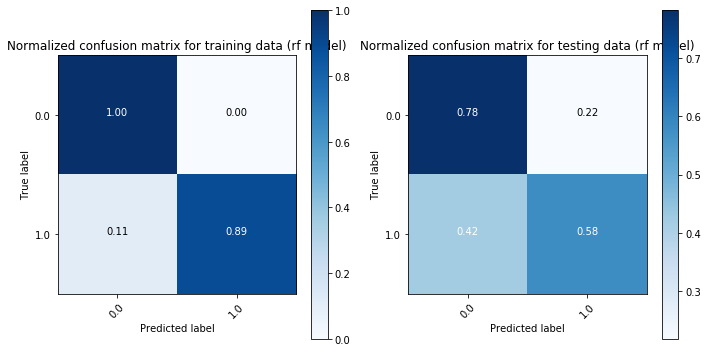

In [291]:
# plot the confusion matrix of the model
class_names = set(y_train_bi)
plt.figure(figsize=(10, 5))
cm_rf_1_train = confusion_matrix(y_train_bi, y_hat_train_rf_prob_class)
cm_rf_1_test = confusion_matrix(y_test_bi, y_hat_test_rf_prob_class)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_rf_1_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (rf model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_rf_1_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (rf model)')

AUC: 0.7312016432728518


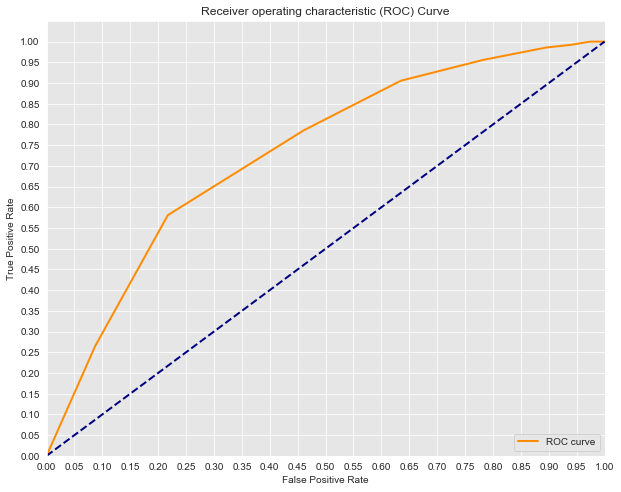

In [292]:
func.plot_roc_curve(y_test_bi, y_hat_test_rf_prob, title='Receiver operating characteristic (ROC) Curve')

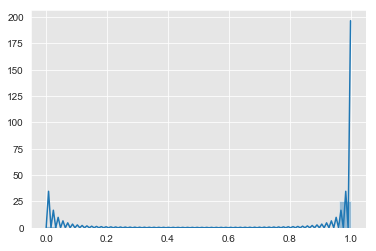

In [293]:
sns.distplot(y_hat_test_rf)

In [300]:
print('The accuracy of the random forest model: {}'.format(func.accuracy(cm_rf_1_test)))
print('The precision of the random forest model: {}'.format(func.precision(cm_rf_1_test)))
print('The recall of the random forest model: {}'.format(func.recall(cm_rf_1_test)))
print('The F1 score of the random forest model: {}'.format(func.F1(cm_rf_1_test)))

The accuracy of the random forest model: 0.612
The precision of the random forest model: 0.9365482233502538
The recall of the random forest model: 0.5811023622047244
The F1 score of the random forest model: 0.717201166180758


In [369]:
result_rf = [func.accuracy(cm_rf_1_test),
                 func.precision(cm_rf_1_test),
                 func.recall(cm_rf_1_test),
                 func.F1(cm_rf_1_test)]

result_df = pd.DataFrame(np.array([result_rf]),
                        columns=['accuracy','precision','recall','F1'])

In [370]:
result_df.index = ['random forest']
result_df

,accuracy,precision,recall,F1
random forest,0.612,0.936548,0.581102,0.717201


<a id='pred_nb'><a/>
### 3.3 Predict the sentiment using Naive Bayes model

Using the pipeline

In [312]:
porter = PorterStemmer()

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True,
#                               tokenizer=func.Porter_Stemmer(),
                              stop_words=nltk.corpus.stopwords.words('english'),
                              max_features=2000)),
    ('nb', MultinomialNB())
])

grid = [{'nb__alpha': np.logspace(base=10, start=-10, stop=0, num=10)}]

gridsearch = GridSearchCV(estimator = pipe_nb,
                         param_grid = grid,
                         scoring = 'accuracy', 
                         cv = 3)

gridsearch.fit(X_train_1, y_train_bi)

print(gridsearch.best_params_)

{'nb__alpha': 0.07742636826811278}


In [313]:
pipe_nb = gridsearch.best_estimator_

In [314]:
y_hat_test_nb_prob_p = pipe_nb.predict_proba(X_test_1)[:,1]
y_hat_train_nb_prob_p = pipe_nb.predict_proba(X_train_1)[:,1]

In [321]:
y_hat_train_nb_prob_class_p = np.ones(y_hat_train_nb_prob_p.shape)
for idx, value in enumerate(y_hat_train_nb_prob_p):
    if value <= 0.84:
        y_hat_train_nb_prob_class_p[idx] = 0
    else:
        y_hat_train_nb_prob_class_p[idx] = 1

In [322]:
y_hat_test_nb_prob_class_p = np.ones(y_hat_test_nb_prob_p.shape)
for idx, value in enumerate(y_hat_test_nb_prob_p):
    if value <= 0.84:
        y_hat_test_nb_prob_class_p[idx] = 0
    else:
        y_hat_test_nb_prob_class_p[idx] = 1

Normalized confusion matrix
[[0.92941176 0.07058824]
 [0.15890411 0.84109589]]
Normalized confusion matrix
[[0.70434783 0.29565217]
 [0.23779528 0.76220472]]


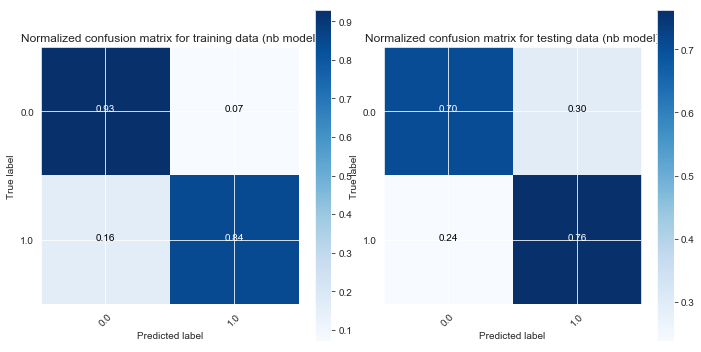

In [323]:
# plot the confusion matrix of the model
class_names = set(y_hat_train_nb_prob_class_p)
plt.figure(figsize=(10, 5))
cm_nb_1_train_p = confusion_matrix(y_train_bi, y_hat_train_nb_prob_class_p)
cm_nb_1_test_p = confusion_matrix(y_test_bi, y_hat_test_nb_prob_class_p)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_nb_1_train_p, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (nb model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_nb_1_test_p, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (nb model)')

AUC: 0.8295241355700103


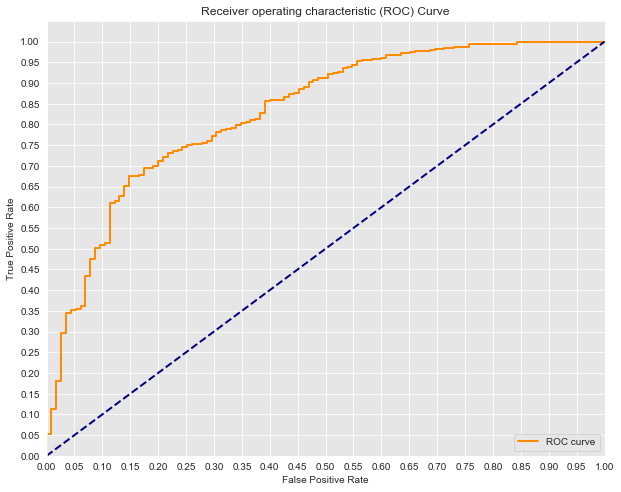

In [324]:
func.plot_roc_curve(y_test_bi, y_hat_test_nb_prob_p)

In [326]:
print('The accuracy of the random forest model: {}'.format(func.accuracy(cm_nb_1_test_p)))
print('The precision of the random forest model: {}'.format(func.precision(cm_nb_1_test_p)))
print('The recall of the random forest model: {}'.format(func.recall(cm_nb_1_test_p)))
print('The F1 score of the random forest model: {}'.format(func.F1(cm_nb_1_test_p)))

The accuracy of the random forest model: 0.7533333333333333
The precision of the random forest model: 0.9343629343629344
The recall of the random forest model: 0.7622047244094489
The F1 score of the random forest model: 0.839549002601908


In [328]:
result_nb = [func.accuracy(cm_nb_1_test_p),
                 func.precision(cm_nb_1_test_p),
                 func.recall(cm_nb_1_test_p),
                 func.F1(cm_nb_1_test_p)]

result_nb_df = pd.DataFrame(np.array([result_nb]),
                        columns=['accuracy','precision','recall','F1'])

In [329]:
result_nb_df.index = ['naive bayes']
result_nb_df

,accuracy,precision,recall,F1
naive bayes,0.753333,0.934363,0.762205,0.839549


In [371]:
result_df = result_df.append(result_nb_df)
result_df

,accuracy,precision,recall,F1
random forest,0.612000,0.936548,0.581102,0.717201
naive bayes,0.753333,0.934363,0.762205,0.839549


Without pipeline

In [ ]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train_wide, y_train_bi)
y_hat_test_NB = clf_NB.predict(X_test_wide)
y_hat_train_NB = clf_NB.predict(X_train_wide)

In [ ]:
y_hat_test_nb_prob = clf_NB.predict_proba(X_test_wide)[:,1]
y_hat_train_nb_prob = clf_NB.predict_proba(X_train_wide)[:,1]

In [ ]:
y_hat_train_nb_prob_class = np.ones(y_hat_train_nb_prob.shape)
for idx, value in enumerate(y_hat_train_nb_prob):
    if value <= 0.92:
        y_hat_train_nb_prob_class[idx] = 0
    else:
        y_hat_train_nb_prob_class[idx] = 1

In [ ]:
y_hat_test_nb_prob_class = np.ones(y_hat_test_nb_prob.shape)
for idx, value in enumerate(y_hat_test_nb_prob):
    if value <= 0.92:
        y_hat_test_nb_prob_class[idx] = 0
    else:
        y_hat_test_nb_prob_class[idx] = 1

In [ ]:
# plot the confusion matrix of the model
class_names = set(y_hat_train_nb_prob_class)
plt.figure(figsize=(10, 5))
cm_nb_1_train = confusion_matrix(y_train_bi, y_hat_train_nb_prob_class)
cm_nb_1_test = confusion_matrix(y_test_bi, y_hat_test_nb_prob_class)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_nb_1_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (nb model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_nb_1_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (nb model)')

In [ ]:
print('The accuracy of the random forest model: {}'.format((cm_nb_1_test[0,0]+cm_nb_1_test[1,1])/
                                                        (cm_nb_1_test.sum().sum())))

<a id='pred_svm'><a/>
### 3.4 Predict the sentiment using Support Vector model

Using pipeline

In [332]:
porter = PorterStemmer()

pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True,
#                               tokenizer=func.Porter_Stemmer(),
                              stop_words=nltk.corpus.stopwords.words('english'),
                              max_features=2000)),
    ('svm', svm.SVC(probability=True))
])

grid = [{'svm__C': np.logspace(base=10, start=-10, stop=0, num=10)}]

gridsearch = GridSearchCV(estimator = pipe_svm,
                         param_grid = grid,
                         scoring = 'accuracy', 
                         cv = 3)

gridsearch.fit(X_train_1, y_train_bi)

print(gridsearch.best_params_)

/Users/shufang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



{'svm__C': 1e-10}


In [333]:
pipe_svm = gridsearch.best_estimator_

In [334]:
y_hat_test_svm_prob_p = pipe_svm.predict_proba(X_test_1)[:,1]
y_hat_train_svm_prob_p = pipe_svm.predict_proba(X_train_1)[:,1]

In [341]:
y_hat_train_svm_prob_class_p = np.ones(y_hat_train_svm_prob_p.shape)
for idx, value in enumerate(y_hat_train_svm_prob_p):
    if value <= 0.80:
        y_hat_train_svm_prob_class_p[idx] = 0
    else:
        y_hat_train_svm_prob_class_p[idx] = 1

In [342]:
y_hat_test_svm_prob_class_p = np.ones(y_hat_test_svm_prob_p.shape)
for idx, value in enumerate(y_hat_test_svm_prob_p):
    if value <= 0.80:
        y_hat_test_svm_prob_class_p[idx] = 0
    else:
        y_hat_test_svm_prob_class_p[idx] = 1

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


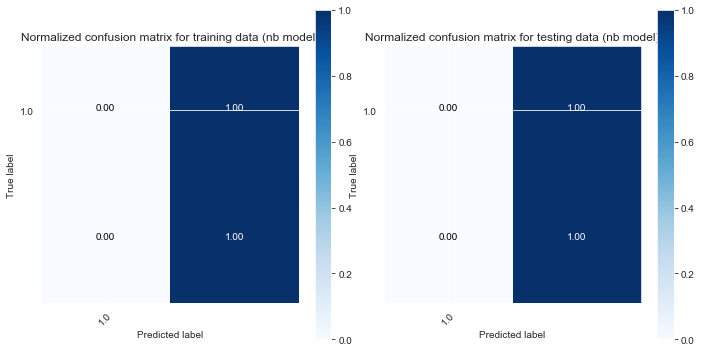

In [343]:
# plot the confusion matrix of the model
class_names = set(y_hat_train_svm_prob_class_p)
plt.figure(figsize=(10, 5))
cm_svm_1_train_p = confusion_matrix(y_train_bi, y_hat_train_svm_prob_class_p)
cm_svm_1_test_p = confusion_matrix(y_test_bi, y_hat_test_svm_prob_class_p)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_svm_1_train_p, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (nb model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_svm_1_test_p, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (nb model)')

Without pipeline

In [345]:
clf_svm = svm.SVC(C=10^1, probability=True)
clf_svm.fit(X_train_wide, y_train_bi)
y_hat_test_svm = clf_svm.predict(X_test_wide)
y_hat_train_svm = clf_svm.predict(X_train_wide)

/Users/shufang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [346]:
y_hat_test_svm_prob = clf_svm.predict_proba(X_test_wide)[:,1]
y_hat_train_svm_prob = clf_svm.predict_proba(X_train_wide)[:,1]

In [358]:
y_hat_train_svm_prob_class = np.ones(y_hat_train_svm_prob.shape)
for idx, value in enumerate(y_hat_train_svm_prob):
    if value <= 0.81:
        y_hat_train_svm_prob_class[idx] = 0
    else:
        y_hat_train_svm_prob_class[idx] = 1

In [359]:
y_hat_test_svm_prob_class = np.ones(y_hat_test_svm_prob.shape)
for idx, value in enumerate(y_hat_test_svm_prob):
    if value <= 0.81:
        y_hat_test_svm_prob_class[idx] = 0
    else:
        y_hat_test_svm_prob_class[idx] = 1

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[0.53043478 0.46956522]
 [0.34015748 0.65984252]]


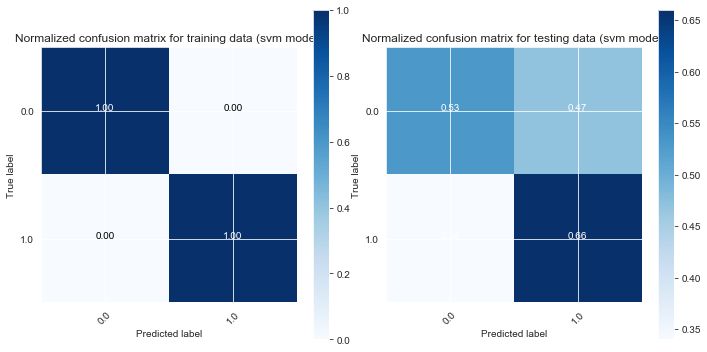

In [360]:
# plot the confusion matrix of the model
class_names = set(y_hat_train_svm_prob_class)
plt.figure(figsize=(10, 5))
cm_svm_1_train = confusion_matrix(y_train_bi, y_hat_train_svm_prob_class)
cm_svm_1_test = confusion_matrix(y_test_bi, y_hat_test_svm_prob_class)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_svm_1_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (svm model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_svm_1_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (svm model)')

AUC: 0.6354809996576515


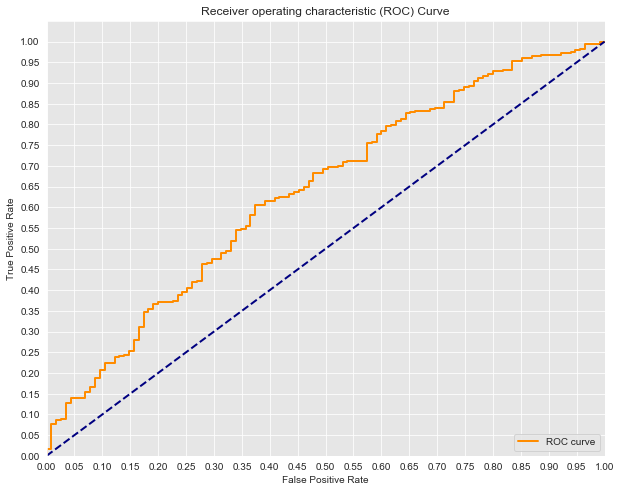

In [361]:
func.plot_roc_curve(y_test_bi, y_hat_test_svm_prob)

In [362]:
print('The accuracy of the support vector machine model: {}'.format(func.accuracy(cm_svm_1_test)))
print('The precision of the support vector machine model: {}'.format(func.precision(cm_svm_1_test)))
print('The recall of the support vector machine model: {}'.format(func.recall(cm_svm_1_test)))
print('The F1 score of the support vector machine model: {}'.format(func.F1(cm_svm_1_test)))

The accuracy of the support vector machine model: 0.64
The precision of the support vector machine model: 0.8858350951374208
The recall of the support vector machine model: 0.6598425196850394
The F1 score of the support vector machine model: 0.7563176895306859


In [363]:
result_svm = [func.accuracy(cm_svm_1_test),
                 func.precision(cm_svm_1_test),
                 func.recall(cm_svm_1_test),
                 func.F1(cm_svm_1_test)]

result_svm_df = pd.DataFrame(np.array([result_svm]),
                        columns=['accuracy','precision','recall','F1'])

In [364]:
result_svm_df.index = ['support vector machine']
result_svm_df

,accuracy,precision,recall,F1
support vector machine,0.64,0.885835,0.659843,0.756318


In [372]:
result_df = result_df.append(result_svm_df)
result_df

,accuracy,precision,recall,F1
random forest,0.612000,0.936548,0.581102,0.717201
naive bayes,0.753333,0.934363,0.762205,0.839549
support vector machine,0.640000,0.885835,0.659843,0.756318


[Text(0.5, 1.0, 'The metrics scores of the three models')]

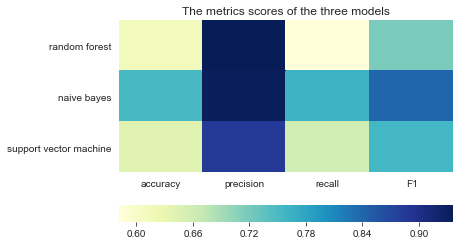

In [650]:
# fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(result_df, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"}).set(title='The metrics scores of the three models')
# heatmap.set(title='The metrics scores of the three models')

<a id='pred_lstm'><a/>
### 4.  Using LSTM recurrent nerual network to predict the sentiments

In [579]:
# from keras.layers.recurrent import LSTM
from tensorflow import keras
from tensorflow.python.keras import backend as k
import tensorflow as tf  
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [580]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [581]:
model = LSTM(100)

In [582]:
X_train = X_train_1.copy()
X_test = X_test_1.copy()

In [583]:
X_train = [review.lower() for review in X_train.values]
X_test = [review.lower() for review in X_test.values]

In [584]:
porter1 = PorterStemmer()
porter2 = PorterStemmer()
stemmed_X_train_df = [porter1.stem(document) for document in X_train_1]
stemmed_y_train_df = [porter2.stem(document) for document in X_test_1]

In [585]:
X_train = [review.split(" ") for review in stemmed_X_train_df]
X_test = [review.split(" ") for review in stemmed_y_train_df]

In [586]:
X = X_train + X_test

In [587]:
# Initialize word2id dictionary that will be used to encode words 
word2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in X:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    

In [627]:
import json

with open('word2id.json', 'w') as fp:
    json.dump(word2id, fp)

In [588]:
max_words = 1000

In [589]:
X_train = [[word2id[word] for word in sentence] for sentence in X_train]
X_test = [[word2id[word] for word in sentence] for sentence in X_test]

In [448]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [449]:
embedding_size = 32
vocabulary_size = 60000

model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          1920000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,928,353
Trainable params: 1,928,353
Non-trainable params: 0
_________________________________________________________________
None


In [450]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [451]:
y_train = y_train_bi.copy()
y_test = y_test_bi.copy()

In [452]:
X_train.shape

(2250, 1000)

In [453]:
batch_size = 64
num_epochs = 10

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 2186 samples, validate on 64 samples
Epoch 1/10
2186/2186 [==============================] - 35s 16ms/sample - loss: 0.5795 - acc: 0.7996 - val_loss: 0.3793 - val_acc: 0.8750
Epoch 2/10
2186/2186 [==============================] - 35s 16ms/sample - loss: 0.4747 - acc: 0.8092 - val_loss: 0.3964 - val_acc: 0.8750
Epoch 3/10
2186/2186 [==============================] - 36s 16ms/sample - loss: 0.4189 - acc: 0.8092 - val_loss: 0.3451 - val_acc: 0.8750
Epoch 4/10
2186/2186 [==============================] - 37s 17ms/sample - loss: 0.2617 - acc: 0.8856 - val_loss: 0.3235 - val_acc: 0.8750
Epoch 5/10
2186/2186 [==============================] - 35s 16ms/sample - loss: 0.1440 - acc: 0.9657 - val_loss: 0.3553 - val_acc: 0.8438
Epoch 6/10
2186/2186 [==============================] - 34s 15ms/sample - loss: 0.0841 - acc: 0.9881 - val_loss: 0.4249 - val_acc: 0.8438
Epoch 7/10
2186/2186 [==============================] - 34s 15ms/sample - loss: 0.0480 - acc: 0.9954 - val_loss: 0.5442 - val_

In [454]:
# Save the weights
model.save_weights('model_weights_1.h5')

# Save the model architecture
with open('model_architecture_1.json', 'w') as f:
    f.write(model.to_json())

In [609]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture_1.json', 'r') as f:
    model = tf.keras.models.model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights_1.h5')

In [610]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [458]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 85.33%


In [460]:
df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,sentiment_encoded
254,1400501466,"[1, 2]",5.0,"The nook tablet is great.I have used it to check e-mail,browse and look at books,and also transferred one from my p.c.I like the way it will sync with the direction its rotated,and I love the touch screen.Thanks Amazon!","08 4, 2013",AHEP4N0XIJR1K,jlt246,New Nook H D,1375574400,positive,1.0
258,1400501466,"[2, 3]",5.0,"I have tried the IPad, the Kindle, and the Sony, and nothing has worked better than this Nook Tablet. It's light, the screen resolution is amazing for movies, and the applications I use work beautifully. Even the speakers are excellent for what they are. No complaints at all.","02 16, 2012",A1WRXACOKPITBQ,"Leiah ""So, I Read This Book Today . . .""",Best out there,1329350400,positive,1.0
271,1400501466,"[0, 0]",5.0,my wife was tired of dragging books around she loves the covienence of the tablet and can make the text larger,"06 11, 2013",A2DN13HKY0A58L,stephen p brazzale,present for wife,1370908800,positive,1.0
291,1400501520,"[2, 5]",5.0,I bought the Nook primarily for reading but wanted the HD for email and web browsing also. I was pleasantly surprised at the exceptional screen quality and ease of setup.I did not want to spend the money for an IPAD and now I am glad I didn't as I prefer the Nook interface for reading. The screen brightness can be changed anytime during reading but on the IPAD you have to go into settings after exiting the book you are reading. The only downside is there are not as many apps written for the Nook. I am hoping that will change.,"02 18, 2013",ASHQ1JCA241D6,"Loraine Arnold ""Loraine""",Great tablet and ereader,1361145600,positive,1.0
297,1400501520,"[13, 17]",5.0,"It is too bad that the Nook HD hasn't received more kudos. To be honest, I knew it had a great screen, a fast proce fast processor, great battery life, and oh so light and easy to handle. But, I did wait for a means for rooting the Nook HD to become available. Now the tablet lives up to all its potential. Rooting is quite easy and it is a great tablet","01 17, 2013",AOHQVDAGYMV6J,"sal ""salby""",Nook HD has a lot to offer,1358380800,positive,1.0
307,1400501776,"[40, 40]",5.0,"If you buy this from a B&N; store, and are a member of B&N;, you can get this for $174, which is cheaper than the 8 gig Fire. If you already are loaded with Kindle books, B&N; foolishly doesn't have a Kindle app, but you can, on Amazon or n2a.com buy an n2a card which allows you to boot your Nook up as a full Android complete with access to the Android Market (or whatever Google is calling it now), and get the Kindle app to accress all your Kindle books. Since I love the design of the eReader on the Nook, I use my n2a card only when I want a Kindle book. I find the B&N; Nook books are usually the same price as Kindle. Occasionally, Kindle doesn't have a book I want but Nook does. Also, Nook may not have a book Kindle has. Also, Nook books have the page perfect series, as well as Enhanced Editions with embedded videos and audio clips, neither of which Kindle has.The Nook has a tab for ""My Stuff"" so you can drag things from your PC to the Nook. If you want more space for your stuff, you can get any sized san disk for the Nook. I have a 32 gb one because I transferred about 4,000 pictures to my Nook and am using an app to edit the pictures and then make slide shows of them. Then I'll drag the shows back onto my computer and burn them to disc. Did I mention the Nook is a joy to use? I actually got thre 16gig Tablet but the 8 gig is as fast and has the 11 1/2 hour battery as well as allows the same cards to be added.","04 23, 2012",A2FHM5FB0BXKGA,"Dr. Elaine O. Chaika ""book, movie, tech lover""",Biggest Deal Around,1335139200,positive,1.0
321,1400532620,"[0, 0]",3.0,This nook has a very nice format and is very easy to operate and view. The only draw back is the Battery life is terrible. I am charging this u

In [570]:
X_text_bad = df.iloc[6,3]
X_text_good = df.iloc[1,3]

In [571]:
X_text_bad

'This nook has a very nice format and is very easy to operate and view.  The only draw back is the Battery life is terrible.  I am charging this unit twice a day.  My former Simple Touch only needed charging once a month &#34;with the wifi ON&#34; all the time.  I would NOT recommend this product.'

In [572]:
X_text_good

"I have tried the IPad, the Kindle, and the Sony, and nothing has worked better than this Nook Tablet. It's light, the screen resolution is amazing for movies, and the applications I use work beautifully. Even the speakers are excellent for what they are. No complaints at all."

In [573]:
X_text_bad = X_text_bad.split(" ") 
X_text_good = X_text_good.split(" ") 

In [574]:
X_text_good = [word.lower() for word in X_text_good]
X_text_bad = [word.lower() for word in X_text_bad]

In [564]:
# new_X_text_bad = ""
# for x in X_text_bad:
#     new_X_text_bad += x
# new_X_text_bad

In [566]:
# new_X_text_good = ""
# for x in X_text_good:
#     new_X_text_good += x
# new_X_text_good

In [576]:
# # X_text_bad = X_text_bad.lower()
# # X_text_good = X_text_good.lower() 
# X_text_bad = new_X_text_bad.split(" ") 
# X_text_good = new_X_text_good.split(" ") 
X_text_bad = [word2id[word] for word in X_text_bad] 
X_text_good = [word2id[word] for word in X_text_good] 

In [596]:
X_text_bad = sequence.pad_sequences([X_text_bad], maxlen=max_words)
X_text_good = sequence.pad_sequences([X_text_good], maxlen=max_words)

In [611]:
y_text_bad_pred = model.predict_proba(X_text_bad)
y_text_good_pred = model.predict_proba(X_text_good)

In [618]:
y_text_bad_pred[0,0]

0.090578

In [615]:
print(y_text_bad_pred)
print(y_text_good_pred)

[[0.090578]]
[[0.9986885]]


In [621]:
def predict_sentiment(text):
    text = str(text)
    text = text.split(" ") 
    text = [word.lower() for word in text]
    text = [word2id[word] for word in text] 
    text = sequence.pad_sequences([text], maxlen=max_words)
    text_pred = model.predict_proba(text)
    return "The predicted sentiment of this text is: {} (while 1 means positive, 0 means neagtive)".format(text_pred[0,0])

In [628]:
text = 'I loved the nook. I eventually bought an ipad and gave this to my nephew, he still loves and uses it everyday'
predict_sentiment(text)

'The predicted sentiment of this text is: 0.9983003735542297, while 1 means positive, 0 means neagtive'

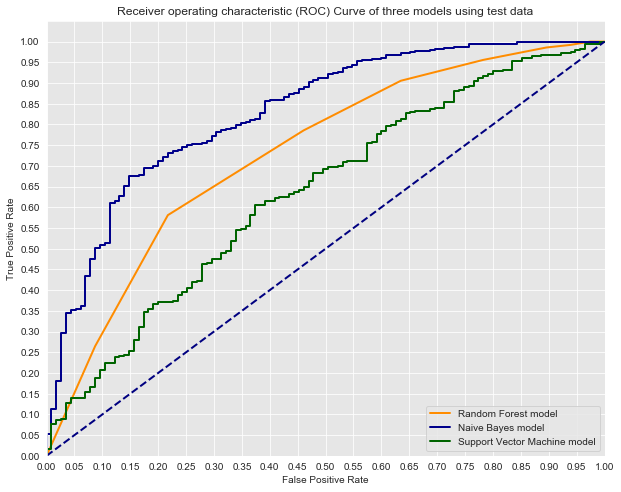

In [616]:
list_of_y_score = [y_hat_test_rf_prob, y_hat_test_nb_prob_p, y_hat_test_svm_prob]
cm_name = ['Random Forest model','Naive Bayes model','Support Vector Machine model']
fpr = {}
tpr = {}
for idx,y_score in enumerate(list_of_y_score):
    if idx > 4:
        fpr[idx], tpr[idx], _ = roc_curve(y_test, y_score[:,1])
    else:
        fpr[idx], tpr[idx], _ = roc_curve(y_test, y_score)
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize=(10,8))
# plt.figure(figsize=(10,8))
lw = 2
ax = plt.plot(fpr[0], tpr[0], color='darkorange',
    lw=lw, label=cm_name[0])
ax = plt.plot(fpr[1], tpr[1], color='darkblue',
    lw=lw, label=cm_name[1])
ax = plt.plot(fpr[2], tpr[2], color='darkgreen',
    lw=lw, label=cm_name[2])
# ax = plt.plot(fpr[3], tpr[3], color='red',
#     lw=lw, label=cm_name[3])
# ax = plt.plot(fpr[4], tpr[4], color='yellow',
#     lw=lw, label=cm_name[4])
# ax = plt.plot(fpr[5], tpr[5], color='purple',
#     lw=lw, label=cm_name[5])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve of three models using test data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import te

<a id='recomm'><a/>
## 5. Recommendation system

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
product_df.head()

In [ ]:
product_df.shape

In [ ]:
ratings = spark.createDataFrame(product_df[:1000])

In [ ]:
ratings

In [ ]:
ratings.show()

In [ ]:
ratings.createOrReplaceTempView('ratings')

In [ ]:
query = """
SELECT product, COUNT(user) AS n_ratings
FROM ratings
GROUP BY product
ORDER BY n_ratings DESC
LIMIT 1000
"""
top_products = spark.sql(query)

In [ ]:
query = """
SELECT user, COUNT(product) AS n_reviews
FROM ratings
GROUP BY user
ORDER BY n_reviews DESC
LIMIT 1000
"""
top_users = spark.sql(query)

In [ ]:
top_products.show(5)

In [ ]:
top_users.show(5)

In [ ]:
query = """
SELECT user, product, rating 
FROM ratings
WHERE user IN (SELECT user FROM top_users WHERE n_reviews >= 2)
LIMIT 1000
"""
frequent_products_users = 

In [ ]:
(training, test) = ratings.randomSplit([0.8, 0.2])

In [ ]:
als = ALS(rank=10, maxIter=5, regParam=0.01, userCol="user", itemCol="product", ratingCol="rating",
          coldStartStrategy="drop")
model = als.fit(training)

In [ ]:
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

In [ ]:
userRecs = model.recommendForAllUsers(1)

In [ ]:
userRecs.show(1)

<a id='tag'><a/>
## 6. Product reviews tag extractor

To understand the strength and weakness of the products, we can first divide the reviews into positive and negative ones. Then, we can try to get the positive keywords in a negative review to learn the strength. Similarly, we get the negative keywords in a positive reviwe to learn the weakness. Specific API has been used, which is MonkeyLearn API. 

In [29]:
# slice the negative reviews
kindle_fire_negative_df = kindle_fire_df[kindle_fire_df['overall']<=4]
print('the number of the negative reviews of kindle fire :{}'.format(kindle_fire_negative_df.shape[0]))

kindle_fire_negative_dict = {idx: [reviewText, rating] for (idx, (reviewText, rating)) in 
                             enumerate(zip(kindle_fire_negative_df['reviewText'].values,
                                          kindle_fire_negative_df['overall'].values))}

the number of the negative reviews of kindle fire :587


In [30]:
# slice the positive reviews
kindle_fire_positive_df = kindle_fire_df[kindle_fire_df['overall']==5]
print('the number of the positive reviews of kindle fire :{}'.format(kindle_fire_positive_df.shape[0]))

kindle_fire_positive_dict = {idx: [reviewText, rating] for (idx, (reviewText, rating)) in 
                             enumerate(zip(kindle_fire_positive_df['reviewText'].values,
                                          kindle_fire_positive_df['overall'].values))}

the number of the positive reviews of kindle fire :1482


In [ ]:
# Load opinion lexicon
neg_file = open("lexicon/neg_words.txt",encoding = "ISO-8859-1")
pos_file = open("lexicon/pos_words.txt",encoding = "ISO-8859-1")
neg = [line.strip() for line in neg_file.readlines()]
pos = [line.strip() for line in pos_file.readlines()]
opinion_words = neg + pos

In [31]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/ABSA16_Laptops_Train_SB1_v2.xml')
root = tree.getroot()

In [32]:
# Use this dataframe for multilabel classification
# Must use scikitlearn's multilabel binarizer

labeled_reviews = []
for review in root.findall("Review"):
    for sentences in review:
        for sentence in sentences:
#             print(sentence[0].text)
            entry = {}
            aspects = []
            polarity = []
            if sentence.find("Opinions"):
                for aspect in sentence.find("Opinions"):
                    aspects.append(aspect.get("category"))
                    polarity.append(aspect.get("polarity"))
            entry["text"], entry["polarity"], entry["aspects"]= sentence[0].text, polarity, aspects
            labeled_reviews.append(entry)
        labeled_df = pd.DataFrame(labeled_reviews)
print("there are",len(labeled_reviews),"reviews in this training set")
# print(sentence.find("aspectCategories").findall("aspectCategory").get("category"))

there are 2500 reviews in this training set


In [33]:
labeled_df['aspects'].values

array([list([]), list(['LAPTOP#GENERAL']),
       list(['BATTERY#OPERATION_PERFORMANCE']), ...,
       list(['LAPTOP#QUALITY']),
       list(['LAPTOP#OPERATION_PERFORMANCE', 'LAPTOP#DESIGN_FEATURES', 'LAPTOP#GENERAL']),
       list(['LAPTOP#PRICE'])], dtype=object)

In [34]:
# Find the main category of each aspect and store it in the dataframe
categories = []
for lisst in labeled_df['aspects'].values:
    sub_list = []
    if lisst != []:
        for aspect in lisst:
            sub_list.append(aspect.split("#")[-1].lower())
    categories.append(sub_list)
labeled_df['category'] = categories

In [35]:
# Save annotated reviews
labeled_df.to_pickle("pickle/annotated_laptop_reviews_df.pkl")
labeled_df.head()

,aspects,polarity,text,category
0,[],[],Being a PC user my whole life....,[]
1,[LAPTOP#GENERAL],[positive],This computer is absolutely AMAZING!!!,[general]
2,[BATTERY#OPERATION_PERFORMANCE],[positive],10 plus hours of battery...,[operation_performance]
3,"[CPU#OPERATION_PERFORMANCE, GRAPHICS#GENERAL]","[positive, positive]",super fast processor and really nice graphics ...,"[operation_performance, general]"
4,[HARD_DISC#DESIGN_FEATURES],[positive],and plenty of storage with 250 gb(though I wil...,[design_features]


In [36]:
labeled_df = pd.read_pickle("pickle/annotated_laptop_reviews_df.pkl")

In [41]:
annotated_reviews_df = labeled_df.copy()

# Convert the multi-labels into arrays
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(annotated_reviews_df.aspects)
X = annotated_reviews_df.text

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# save the the fitted binarizer labels
# This is important: it contains the how the multi-label was binarized, so you need to
# load this in the next folder in order to undo the transformation for the correct labels.
filename = 'pickle/mlb.pkl'
pickle.dump(mlb, open(filename, 'wb'))

In [39]:
with open('pickle/mlb.pkl', 'rb') as f:
    mlb = pickle.load(f)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import LabelPowerset
import numpy as np

# LabelPowerset allows for multi-label classification
# Build a pipeline for multinomial naive bayes classification
text_clf = Pipeline([('vect', CountVectorizer(stop_words = "english",ngram_range=(1, 1))),
                     ('tfidf', TfidfTransformer(use_idf=False)),
                     ('clf', LabelPowerset(MultinomialNB(alpha=1e-1))),])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

# Calculate accuracy
print(np.mean(predicted == y_test))

filename = 'pickle/text_clf.pkl'
pickle.dump(text_clf, open(filename, 'wb'))

0.9865481481481482


In [43]:
with open('pickle/text_clf.pkl', 'rb') as f:
    text_clf = pickle.load(f)

In [44]:
#mlb.inverse_transform(predicted)
pred_df = pd.DataFrame(
    {'text': X_test,
     'pred_category': mlb.inverse_transform(predicted)
    })

In [45]:
pd.set_option('display.max_colwidth', -1)
pred_df.head(3)

,text,pred_category
53,"Yes, I have it on the highest available setting.",()
2391,"Don't expect great graphics, though.","(LAPTOP#MISCELLANEOUS,)"
2310,They are loud and clunky but I figured I'd get used to it.,()


Predict the whole dataset

In [47]:
# predicted = text_clf.predict()

In [48]:
kindle_fire_df.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,datetime
0,1268161,B0074BW614,"[0, 1]",4.0,"I loved my Kindle Fire my son bought me for Christmas. Well, it died on me so this one is a replacement. Everything is fine except one of the games I noticed didn't hold anything. My grandson plays Subway Surfer and he worked for months to get the guys and prices by collecting all the boxes and points. Well, this new one didn't save it so he lost all of it. He was heart broken. he is only 7 yrs old with some issues and it broke my heart that this game wasn't saved for him. I would of thought that since they had all the other stuff they could keep the progress on the games too.Besides for that it is great. It took a while to remember the setup and all but eventually I got it. I would recommend this to anyone. Especially for young ones.","09 19, 2013",A1QIJGJGUC7M3N,NaN,Just Fine,1379548800,2013-09-19


In [49]:
reviews = []
for review in kindle_fire_df.reviewText.values:
    split_review = [sentence.strip() for sentence in review.split(".")]
    cleaned_review = []
    for string in split_review:
        if string != "":
            cleaned_review.append(string)
    reviews.append(cleaned_review)

In [50]:
from textblob import TextBlob
a_text =  'Netflix, HBO Go and Showtime Anytime all operate smoothly and are very responsive'
blob = TextBlob(a_text)
print(blob.sentiment)

Sentiment(polarity=0.30000000000000004, subjectivity=0.4)


In [51]:
reviews[9]

['Pros:Free Time for kids is a great idea and well executed',
 'It has a deep selection of apps, books and videos which my daughter loves',
 "Amazon's music and video apps work well; they are responsive and fast",
 'Prime members get a lot of nice content and with Autorip from CD and vinyl purchases I have a nice music library',
 'Netflix, HBO Go and Showtime Anytime all operate smoothly and are very responsive',
 'Kindle optimized apps are responsive and smooth',
 "Amazon's cloud serves are reliable and fast",
 'Wifi is downright terrific',
 'As good as I have seen on a tablet',
 'HDMI output makes this a nice portable entertainment hub for traveling',
 'Cons:Web surfing is laggy and clunky',
 'I find all tablets to involve trade offs, and most androids a bit laggy, but this is worse than the high end android tablets and definitely worse than ipad and Windows 8 tablets',
 'Some of the apps are crashy and janky',
 'For example I can never get a table booked on Opentable but never had t

In [52]:
a_test = text_clf.predict(reviews[9])
mlb.inverse_transform(a_test)

[(),
 ('LAPTOP#MISCELLANEOUS',),
 (),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#OPERATION_PERFORMANCE',),
 ('LAPTOP#MISCELLANEOUS',),
 (),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#DESIGN_FEATURES',),
 ('LAPTOP#MISCELLANEOUS',),
 (),
 (),
 (),
 (),
 (),
 ('BATTERY#OPERATION_PERFORMANCE',),
 ('LAPTOP#MISCELLANEOUS',),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#GENERAL',),
 ('LAPTOP#GENERAL',)]

In [59]:
reviews

[['I loved my Kindle Fire my son bought me for Christmas',
  'Well, it died on me so this one is a replacement',
  "Everything is fine except one of the games I noticed didn't hold anything",
  'My grandson plays Subway Surfer and he worked for months to get the guys and prices by collecting all the boxes and points',
  "Well, this new one didn't save it so he lost all of it",
  'He was heart broken',
  "he is only 7 yrs old with some issues and it broke my heart that this game wasn't saved for him",
  'I would of thought that since they had all the other stuff they could keep the progress on the games too',
  'Besides for that it is great',
  'It took a while to remember the setup and all but eventually I got it',
  'I would recommend this to anyone',
  'Especially for young ones'],
 ['Kindle has come up with a new Kindle Fire HDX',
  'Mine is  the older version now',
  "But the &#34;new Kindle Fire HD 7'' has no cam",
  'I dont get it',
  'the newer Kindle Fire HDX is like the old Ki

In [60]:
reviewText = []
predCategory = []
reviewIdx = []
sentiment = []
for idx, review in enumerate(reviews):
    a_test = text_clf.predict(review)
    pred_one_review = mlb.inverse_transform(a_test)
    for sent in review:
        for pred in pred_one_review:
            predCategory.append(pred)
        reviewText.append(sent)
        reviewIdx.append(list(kindle_fire_df['Unnamed: 0'])[idx])
        blob = TextBlob(sent)
        sentiment.append(blob.sentiment.polarity)

In [653]:
kindle_fire_df.shape

(2069, 11)

In [61]:
kindle_fire_df.head(3)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,datetime
0,1268161,B0074BW614,"[0, 1]",4.0,"I loved my Kindle Fire my son bought me for Christmas. Well, it died on me so this one is a replacement. Everything is fine except one of the games I noticed didn't hold anything. My grandson plays Subway Surfer and he worked for months to get the guys and prices by collecting all the boxes and points. Well, this new one didn't save it so he lost all of it. He was heart broken. he is only 7 yrs old with some issues and it broke my heart that this game wasn't saved for him. I would of thought that since they had all the other stuff they could keep the progress on the games too.Besides for that it is great. It took a while to remember the setup and all but eventually I got it. I would recommend this to anyone. Especially for young ones.","09 19, 2013",A1QIJGJGUC7M3N,NaN,Just Fine,1379548800,2013-09-19
1,1268162,B0074BW614,"[0, 1]",3.0,Kindle has come up with a new Kindle Fire HDX... Mine is the older version now. But the &#34;new Kindle Fire HD 7'' has no cam.. I dont get it. the newer Kindle Fire HDX is like the old Kindle Fire... It gets confusing. I read the specs and the new Kindle Fire HDX has improved features but why downgrade the new Kindle Fire HD to a Kindle Fire... so you can justify the higher cost for Kindle Fire HDX 7'' ?Anyway I say I would have given my now older Kindle Fire HD a 5/5 but since the new Kindle Fire HD (without a cam) came out I give it maybe a 3 or 4 star. I have 6 registered Kindle Fire HD (with front cam) and now they are older generation... i will have to wait and see next few weeks / months if i will have problems now that the newer version of Kindle Fire HD (without cam) is out soon.,"09 27, 2013",A3TPTKY0E4YRJF,NaN,"Kindle Fire HD 7"", Dolby Audio, Dual-Band Wi-Fi, 16 GB (with front cam)",1380240000,2013-09-27
2,1268163,B0074BW614,"[0, 2]",5.0,Kindle is a great product and it works for me. My main thing it the fact that it has the hdmi connector to connect to my TV.,"07 17, 2013",AM42286XLFIEP,NaN,love it.,1374019200,2013-07-17


In [62]:
sentence_based_reviews_df = pd.DataFrame(list(zip(reviewIdx, reviewText, predCategory, sentiment)), 
                                         columns = ['reviewID', 'sentence_review', 'predicted_category', 'predicted_sentiment'])

In [65]:
sentence_based_reviews_df.head(5)

,reviewID,sentence_review,predicted_category,predicted_sentiment
0,1268161,I loved my Kindle Fire my son bought me for Christmas,"(LAPTOP#GENERAL,)",0.700000
1,1268161,"Well, it died on me so this one is a replacement",(),0.000000
2,1268161,Everything is fine except one of the games I noticed didn't hold anything,(),0.416667
3,1268161,My grandson plays Subway Surfer and he worked for months to get the guys and prices by collecting all the boxes and points,(),0.000000
4,1268161,"Well, this new one didn't save it so he lost all of it",(),0.136364


In [66]:
sentence_based_reviews_df[sentence_based_reviews_df['reviewID']==1268176]

,reviewID,sentence_review,predicted_category,predicted_sentiment
137,1268176,"This is one powerfull machine!! it will do everything you want it to do, and look fantastic doing it!","(SUPPORT#QUALITY,)",0.500000
138,1268176,It just has a great feel and balance,(),0.800000
139,1268176,"The screen is gorgeous, the unit is light, its really very user friendly","(LAPTOP#MISCELLANEOUS,)",0.418750
140,1268176,I liked my larger kindle fire until I got this one,"(LAPTOP#GENERAL,)",0.300000
141,1268176,"E-reader, netflix viewer, internet searcher","(LAPTOP#GENERAL,)",0.000000
142,1268176,this is the right size for them all,"(LAPTOP#GENERAL,)",0.285714


In [652]:
sentence_based_reviews_df.shape

(20465, 4)

In [67]:
sentence_based_reviews_sliced_df = sentence_based_reviews_df[(sentence_based_reviews_df['predicted_category']!=()) &
                                                      (sentence_based_reviews_df['predicted_sentiment']!=0.000000)]

In [68]:
sentence_based_reviews_sliced_df.head()

,reviewID,sentence_review,predicted_category,predicted_sentiment
0,1268161,I loved my Kindle Fire my son bought me for Christmas,"(LAPTOP#GENERAL,)",0.700000
5,1268161,He was heart broken,"(SUPPORT#QUALITY,)",-0.400000
7,1268161,I would of thought that since they had all the other stuff they could keep the progress on the games too,"(LAPTOP#MISCELLANEOUS,)",-0.125000
8,1268161,Besides for that it is great,"(LAPTOP#GENERAL,)",0.800000
12,1268162,Kindle has come up with a new Kindle Fire HDX,"(LAPTOP#GENERAL,)",0.136364


In [101]:
sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['reviewID']==1268208]

,reviewID,sentence_review,predicted_category,predicted_sentiment
661,1268208,"On the other hand, I already have a laptop for mobile computing, and was already an Amazon Prime member so this provided extra free content in addition to the lower cost","(LAPTOP#GENERAL,)",0.091667
662,1268208,"In the end, since what I wanted was something to watch/listen to media while at work the Kindle is the better choice for me","(LAPTOP#GENERAL,)",0.500000
663,1268208,"There is a lot of overlap between a Kindle and a tablet, but the Kindle is designed mainly to deliver content, movies, books, music through Amazon and some other sources (public library, etc)","(LAPTOP#DESIGN_FEATURES,)",0.013889
664,1268208,"If you need to do spreadsheets, word processing, business apps on the go, this is not the best choice","(LAPTOP#MISCELLANEOUS,)",1.000000
671,1268208,Difficult (though not impossible) to install apps from Google or other sources except the Amazon store,"(LAPTOP#MISCELLANEOUS,)",-0.097222


In [102]:
general_category = []
for x in list(sentence_based_reviews_sliced_df.predicted_category.values):
    general_category.append(x[-1].split("#")[-1].lower())

In [103]:
sentence_based_reviews_sliced_df['predicted_general_category'] = general_category

/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [651]:
sentence_based_reviews_sliced_df.shape

(6394, 6)

In [104]:
sentence_based_reviews_sliced_df

,reviewID,sentence_review,predicted_category,predicted_sentiment,predicted_general_category
0,1268161,I loved my Kindle Fire my son bought me for Christmas,"(LAPTOP#GENERAL,)",0.700000,general
5,1268161,He was heart broken,"(SUPPORT#QUALITY,)",-0.400000,quality
7,1268161,I would of thought that since they had all the other stuff they could keep the progress on the games too,"(LAPTOP#MISCELLANEOUS,)",-0.125000,miscellaneous
8,1268161,Besides for that it is great,"(LAPTOP#GENERAL,)",0.800000,general
12,1268162,Kindle has come up with a new Kindle Fire HDX,"(LAPTOP#GENERAL,)",0.136364,general
17,1268162,It gets confusing,"(SUPPORT#QUALITY,)",-0.300000,quality
19,1268162,so you can justify the higher cost for Kindle Fire HDX 7'' ?Anyway I say I would have given my now older Kindle Fire HD a 5/5 but since the new Kindle Fire HD (without a cam) came out I give it maybe a 3 or 4 star,"(LAPTOP#MISCELLANEOUS,)",0.184343,miscellaneous
20,1268162,I have 6 registered Kindle Fire HD (with front cam) and now they are older generation,"(LAPTOP#GENERAL,)",0.166667,general
21,1268162,i will have to wait and see next few weeks / months if i will have problems now that the newer version of Kindle Fire HD (without cam) is out soon,"(LAPTOP#GENERAL,)",-0.100000,general
22,1268163,Kindle is a great product and it works for me,"(LAPTOP#GENERAL,)",0.800000,general


In [106]:
categories = set(sentence_based_reviews_sliced_df.predicted_general_category.values)

In [107]:
categories

{'connectivity',
 'design_features',
 'general',
 'miscellaneous',
 'operation_performance',
 'price',
 'quality',
 'usability'}

In [635]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='general']['predicted_sentiment'],
    name="general",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='connectivity']['predicted_sentiment'],
    name="connectivity",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='design_features']['predicted_sentiment'],
    name="design_features",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='miscellaneous']['predicted_sentiment'],
    name="miscellaneous",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='operation_performance']['predicted_sentiment'],
    name="operation_performance",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='price']['predicted_sentiment'],
    name="price",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='quality']['predicted_sentiment'],
    name="quality",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='usability']['predicted_sentiment'],
    name="usability",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(107,174,214)',
    line_color='rgb(8,81,156)'
))

fig.layout.update(title_text="The sentiment distribution of each predicted category")

py.plot(fig, filename="sentiment_analysis_third_graph")

fig.show()

In [130]:
sentence_based_reviews_sliced_df[sentence_based_reviews_sliced_df['predicted_general_category']=='usability']['predicted_sentiment'].mean()

0.2808608038052482

In [149]:
sentence_based_reviews_sliced_df['predicted_polarity'] = np.where(sentence_based_reviews_sliced_df['predicted_sentiment']>0, 
                                                                  sentence_based_reviews_sliced_df['predicted_polarity'], 
                                                                  'negative')
sentence_based_reviews_sliced_df['predicted_polarity'] = np.where(sentence_based_reviews_sliced_df['predicted_sentiment']<0, 
                                                                  sentence_based_reviews_sliced_df['predicted_polarity'], 
                                                                  'positive')

/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [150]:
sentence_based_reviews_sliced_df.head(2)

,reviewID,sentence_review,predicted_category,predicted_sentiment,predicted_general_category,predicted_polarity
0,1268161,I loved my Kindle Fire my son bought me for Christmas,"(LAPTOP#GENERAL,)",0.7,general,positive
5,1268161,He was heart broken,"(SUPPORT#QUALITY,)",-0.4,quality,negative


In [155]:
grouped_by_df = pd.DataFrame(sentence_based_reviews_sliced_df.groupby(['predicted_general_category', 'predicted_polarity']).count().predicted_sentiment)

In [164]:
predicted_negative = grouped_by_df['predicted_sentiment'].values[[0,2,4,6,8,10,12,14]]
predicted_positive = grouped_by_df['predicted_sentiment'].values[[1,3,5,7,9,11,13,15]]

In [178]:
grouped_by_polarity_df = pd.DataFrame({'neg':predicted_negative, 'pos':predicted_positive},index=list(grouped_by_df.index.levels[0]))

In [183]:
grouped_by_polarity_df['total'] = grouped_by_polarity_df['neg'] + grouped_by_polarity_df['pos']
grouped_by_polarity_df['neg_norm'] = grouped_by_polarity_df['neg']/grouped_by_polarity_df['total']
grouped_by_polarity_df['pos_norm'] = grouped_by_polarity_df['pos']/grouped_by_polarity_df['total']
grouped_by_polarity_df

,neg,pos,total,neg_norm,pos_norm
connectivity,10,41,51,0.196078,0.803922
design_features,51,221,272,0.187500,0.812500
general,503,2561,3064,0.164164,0.835836
miscellaneous,175,795,970,0.180412,0.819588
operation_performance,242,1061,1303,0.185725,0.814275
price,14,51,65,0.215385,0.784615
quality,94,521,615,0.152846,0.847154
usability,9,45,54,0.166667,0.833333


In [636]:
trace1 = go.Bar(
    x=grouped_by_polarity_df.index,
    y=grouped_by_polarity_df.pos_norm,
    name='% Pos Sentiment'
)
trace2 = go.Bar(
    x=grouped_by_polarity_df.index,
    y=grouped_by_polarity_df.neg_norm,
    name='% Neg Sentiment'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Aspect-Based Sentiment Analysis",
    barmode = 'stack'
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename="sentiment_analysis_fourth_graph")

fig.show()

<a id='time'><a/>
## 7. Product reviews time series

In [ ]:
kindle_fire_df.head()

<a id='GetData'><a/>
### Code did not used 

In [ ]:
# # from neuralcoref import Coref
# import en_core_web_lg
# # spacy = en_core_web_lg.load()
# # coref = Coref(nlp=spacy)

# # # import spacy
# # # nlp = spacy.load('en_core_web_lg')

# # Define function for replacing pronouns using neuralcoref
# def replace_pronouns(text):
#     nlp = en_core_web_lg.load()
#     doc = nlp(text)
#     return doc._.coref_resolved

In [ ]:
# import spacy
# nlp = spacy.load('en_coref_lg')
# text = "Rufus is my dog. He is a good boy."
# doc = nlp(text)

# print(doc._.coref_resolved)

In [ ]:
# # Create a new column for text whose pronouns have been replaced
# annotated_reviews_df["text_pro"] = annotated_reviews_df.text.map(lambda x: replace_pronouns(x))

In [ ]:
# the positive comments in negative reviews
ml = MonkeyLearn('4f672d98c72daa1fffcedae3ebb2b20bf997fbc3')
data = kindle_fire_negative_df['reviewText'].values
model_id = 'ex_N4aFcea3'
results = []
for review in data:
    results.append(ml.extractors.extract(model_id, [review]).body)

In [ ]:
from monkeylearn import MonkeyLearn

ml = MonkeyLearn('4f672d98c72daa1fffcedae3ebb2b20bf997fbc3')
data = ["The hotel has a great location but all in all it was a horrible experience! Only stayed here because it was the pre-accommodation choice for one of our tours but it was terrible. Will never stay here again!"]
model_id = 'ex_N4aFcea3'
result = ml.extractors.extract(model_id, data)
print(result.body)

In [ ]:
from monkeylearn import MonkeyLearn

ml = MonkeyLearn('4f672d98c72daa1fffcedae3ebb2b20bf997fbc3')
data = ["Great out of the box CRM features. Non-profits get 10 licenses free and discounts on the additional license.",
       "Nice pad but the service is really bad."]
model_id = 'cl_sGdE8hD9'
result = ml.classifiers.classify(model_id, data)
print(result.body)

In [ ]:
len(pd.Series(y_test))

y_prob_train

X_test_w_pred

pd.DataFrame(y_test).index

X_test_w_pred = X_test.copy()
X_train_w_pred = X_train.copy()
y_prob_test = clf_NB.predict_proba(X_test_w_pred)[:,1]
y_prob_train = clf_NB.predict_proba(X_train_w_pred)[:,1]
df_test_thresh = pd.concat([pd.DataFrame(y_prob_test, index=pd.DataFrame(y_test).index), pd.DataFrame(y_test)], axis=1)
df_train_thresh = pd.concat([pd.DataFrame(y_prob_train, index=pd.DataFrame(y_train).index), pd.DataFrame(y_train)], axis=1)

df_train_thresh

y_prob

sns.distplot(y_prob)

sns.scatterplot(x=y_prob, y=y_test, alpha=.05)

# plot the confusion matrix of the model
class_names = set(y_train)
plt.figure(figsize=(10, 5))
cm_nb_train = confusion_matrix(y_train, y_hat_train_NB)
cm_nb_test = confusion_matrix(y_test, y_hat_test_NB)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_svm_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (Naive Bayes model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_svm_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (Naive Bayes model)')



y_hat_train_svm.sum()

clf_svm = svm.SVC(C=10^1)
clf_svm.fit(X_train, y_train)
y_hat_test_svm = clf_svm.predict(X_test)
y_hat_train_svm = clf_svm.predict(X_train)



# plot the confusion matrix of the model
class_names = set(y_train)
plt.figure(figsize=(10, 5))
cm_svm_train = confusion_matrix(y_train, y_hat_train_svm)
cm_svm_test = confusion_matrix(y_test, y_hat_test_svm)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_svm_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (svm model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_svm_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (svm model)')

In [ ]:
pipe_nb = Pipeline([
#     ('porter', PorterStemmer()),
    ('tfidf', TfidfVectorizer(lowercase=True,
                              tokenizer=None,
                              stop_words=set(stopwords.words('english')),
                              max_features=2000)),
    ('nb', MultinomialNB())
])

grid = [{'nb_alpha': [0, 10, 10**3, 10**5, 10**7, 10**9]}]

gridsearch = GridSearchCV(estimator = pipe_nb,
                         param_grid = grid,
                         scoring = 'accuracy', 
                         cv = 3)

gridsearch.fit(X_train_1, y_train_bi)

In [ ]:
param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [5, 10, 15],
    'subsample': [0.5, 0.7],
    'n_estimators': [5, 30, 100, 250],
}

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=XGBClassifier(),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train_all_enc, y_train)

In [ ]:
best_parameters = gridsearch.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
logreg_1 = LogisticRegression(fit_intercept=False, C=1e12)
logreg_1.fit(X_train, y_train)
y_hat_train_lr_1 = logreg_1.predict(X_train)
y_hat_test_lr_1 = logreg_1.predict(X_test)

# plot the confusion matrix of the model
class_names = set(y_train)
plt.figure(figsize=(10, 5))
cm_lr_1_train = confusion_matrix(y_train, y_hat_train_lr_1)
cm_lr_1_test = confusion_matrix(y_test, y_hat_test_lr_1)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_lr_1_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (lr model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_lr_1_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (lr model)')

In [ ]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_hat_test_xgb = clf_xgb.predict(X_test)
y_hat_train_xgb = clf_xgb.predict(X_train)

# plot the confusion matrix of the model
class_names = set(y_train)
plt.figure(figsize=(10, 5))
cm_xgb_train = confusion_matrix(y_train, y_hat_train_xgb)
cm_xgb_test = confusion_matrix(y_test, y_hat_test_xgb)
plt.subplot(1, 2, 1)
func.plot_confusion_matrix(cm_xgb_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for training data (xgb model)')
plt.subplot(1, 2, 2)
func.plot_confusion_matrix(cm_xgb_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for testing data (xgb model)')

In [ ]:
clf_xgb = XGBClassifier(learning_rate=0.05, max_depth=4, min_child_weight=10, n_estimators=100, subsample=0.5)
clf_xgb.fit(X_train_all_enc, y_train)
y_hat_test_xgb = clf_xgb.predict(X_test_all_enc)
y_hat_train_xgb = clf_xgb.predict(X_train_all_enc)

In [ ]:
# X_df = pd.DataFrame(vectorized.todense())
# X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y_bi)
svd = TruncatedSVD(n_components=2000)
svd.fit_transform(X_train)

svd.explained_variance_ratio_.sum()

svd.transform(X_test)



In [ ]:
sentences = df.iloc[1,4].lower()
stopWords = set(stopwords.words('english'))
words = word_tokenize(sentences)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)
        
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in wordsFiltered]

print(stemmed_words)

# words = nltk.sent_tokenize(" ".join(stemmed_words))
import string
stemmed_sent = " ".join(stemmed_words)
stemmed_words = str(stemmed_sent.translate(str.maketrans('', '', string.punctuation)))

print(stemmed_words)

import collections
cv = CountVectorizer()
bow = cv.fit_transform([stemmed_words])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

In [ ]:
df_electronics_kindle_sliced.overall.unique()

In [ ]:
# df_electronics_nook_kindle_sliced.iloc[3,3]

In [ ]:
index = []
for idx, review in enumerate(kindles):
    if review['reviewText'].find('kindle') != -1:
        index.append(idx)
print(len(index))
df_kindle_sliced = df_kindles.loc[index]

In [ ]:
# this is for twitter scraping
# import basic libraries
import pandas as pd
import numpy as np
np.random.seed(0)

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import tweepy library for accessing the twitter api
import tweepy

keys = []

with open('.secret') as f:
    for line in f:
        keys.append(line.strip())

In [ ]:
print(keys[0])
print(keys[1])
print(keys[2])
print(keys[3])

In [ ]:
# set the variables for accessing the twitter api
consumer_key = keys[0]
consumer_secret = keys[1]
access_token = keys[2]
access_token_secret = keys[3]  

# get the authentication of the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# search for tweets about airpods
public_tweets = api.search('devices')

for tweet in public_tweets:
    print(tweet.text)

len(public_tweets)